# Crystal Calc
A collection of tools to make an engineer's life easier
## Setup

In [71]:
import numpy as np
import matplotlib.pyplot as plt

parallel = lambda a,b : (a*b)/(a+b)
Fs  = lambda cm,lm       : 1 / (2 * np.pi * np.sqrt(lm * cm))
Fa  = lambda fs,c0,cm    : fs * np.sqrt(1 + cm / c0)
Fl  = lambda fs,c0,cm,cl : fs * ( 1 + cm/( 2 * (c0 + cl) ) )
Ts  = lambda cm,c0,cl    : -( cm / ( 2 * ( c0 + cl )**2 ) )*1e-6
Q   = lambda rm,lm,cm    : (1 / rm) * np.sqrt(lm / cm)
Esr = lambda rm,c0,cl    : rm * (1 + c0 / cl)**2
Ppm = lambda freq,nom    : (freq-nom) * 1e6 / nom

def rms(peak2peak):
    """
    Calculates the rms value of the peak-to-peak measurement.
    """
    return peak2peak / (2 * np.sqrt(2))

def Z(f,rm,cm,lm,c0):
    """
    Determines the impedance 
    of a crystal at a certain frequency.
    """ 
    w = 2 * np.pi * f
    return  parallel((rm + 1/(cm*w) + lm*w) , (1/(c0*2)))

def analyze(rm,cm,lm,c0,cl):
    """"
    Displays the magnitude and phase response of a crystal
    ~~ Not working at the moment ~~
    """
    fs = Fs(cm,lm      )
    fa = Fa(fs,c0,cm   )
    fl = Fl(fs,c0,cm,cl)
    q  = Q (rm,lm,cm   )
    
    print(f"fs = {fs}")
    print(f"fa = {fa}")
    print(f"fl = {fl}")
    print(f"q  = {q }")
    
    # Frequency sweep range calc
    sweepstart = fs - 0.5*(fa-fs)
    sweepend   = fa + 0.5*(fa-fs)
    sweeprange = np.linspace(sweepstart, sweepend, 100000)
    print(f"sweep range = [{sweepstart},{sweepend}]")
    z = Z(sweeprange,rm,cm,lm,c0)
    mag = np.abs(z)
    phase = np.angle(z)
    
#     plt.plot(sweeprange, mag, label='magnitude')
#     plt.plot(sweeprange, phase, label='phase')
#     plt.legend()

## Load to Freq Prediction

In [83]:
fnom = 32768
fs = None
c0 = 1.11226379050365e-12
cm = 4.3243121440552e-15
cl = 4e-12
cl_predict = 3.75e-12
lm = 5460.03575083361
rm = 0
fs = Fs(cm, lm) 

fl = Fl(fs, c0, cm, cl)
ppm = Ppm(fl, fnom)
print(f"FL:  {fl:.2f}\tppm:  {ppm:.2f}\t@ {cl*1e12:.2f}pF")

fl_predict = Fl(fs, c0, cm, cl_predict)
ppm_predict = Ppm(fl_predict, fnom)
print(f"FL:  {fl_predict:.2f}\tppm:  {ppm_predict:.2f}\t@ {cl_predict*1e12:.2f}pF")

print(f"ΔFL: {fl_predict - fl:.2f}\tΔppm: {ppm_predict - ppm:.2f}")
print(f"Ts:  {Ts(cm,c0,cl):.2f}ppm/pF ")

FL:  32767.82	ppm:  -5.58	@ 4.00pF
FL:  32768.53	ppm:  16.15	@ 3.75pF
ΔFL: 0.71	Δppm: 21.74
Ts:  -82.73ppm/pF 


## Drive Level Estimation

In [30]:
# Crystal parameters
rm = 48214.91
c0 = 1.3429e-12
cl = 2e-12 # Estimate

# Current probe parameters
Vcspp = 180.07e-3
v2i = 1/5

esr  = Esr(rm,c0,cl)
i    = Vcspp * v2i
irms = rms(i)
p    = esr * irms**2

print(f"Rm   = {rm:.2f}Ω")
print(f"C0   = {c0 * 1e12:.2f}pF")
print(f"CL   = {cl * 1e12:.2f}pF")
print(f"ESR  = {esr:.2f}Ω")
print(f"Ipp  = {i*1e3:.2f}mA")
print(f"Irms = {irms*1e3:.2f}mA")
print(f"Prms = {p*1e6:.2f}uW")

Rm   = 40.00Ω
C0   = 2.32pF
CL   = 8.00pF
ESR  = 66.56Ω
Ipp  = 16.40mA
Irms = 5.80mA
Prms = 2237.88uW


# Plotting

fs = 31996239.999999974
fa = 32033854.477266256
fl = 32000228.61002589
q  = 114987.19711730855
sweep range = [31977432.761366833,32052661.715899397]
FL ppm = 19.0625


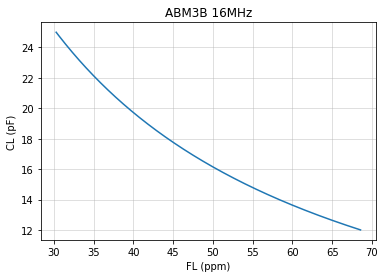

In [39]:
analyze(rm,cm,lm,c0,cl)
clsweep = np.linspace(12e-12,25e-12, 1000)
fl = Fl(fs, c0, cm, clsweep)
ppm = Ppm(fl, 32e6)
plt.plot(ppm+110, clsweep*1e12)
plt.xlabel('FL (ppm)')
plt.ylabel('CL (pF)')
plt.title('ABM3B 16MHz')
plt.grid(alpha=0.5)

print(f"FL ppm = {Ppm(32000610, 32e6)}")